In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format='svg'

G:\newage2\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv('train_Data.csv')

In [3]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7'], dtype='object')

In [4]:
df_min=df[df['7']==0]

In [5]:
df_min.to_csv('ecoli_0_vs_1_minority_train.csv',index=False)
df_min=pd.read_csv('ecoli_0_vs_1_minority_train.csv')

In [6]:
df_majority=df[df['7']==1]
df_majority.to_csv('ecoli_0_vs_1_majority_train.csv',index=False)
df_majority=pd.read_csv('ecoli_0_vs_1_majority_train.csv')

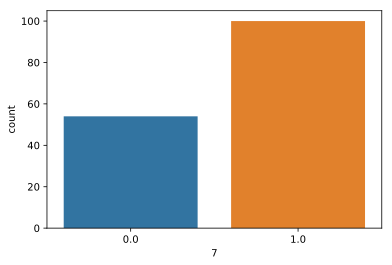

In [7]:
%matplotlib inline
sns.countplot(x='7',data=df)

In [8]:
def create_dataset(dataset,look_back=1):
    
    datax,datay=[],[]
    
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),:]
        datax.append(a)
        datay.append(dataset[i+look_back,:])
    
    return np.array(datax),np.array(datay)

In [9]:
df_minor=np.array(df_min)
scaler=MinMaxScaler(feature_range=(0,1))

df_minor=scaler.fit_transform(df_min)

x,y=create_dataset(df_minor,5)#5
print(x.shape)
print(y.shape)

(48, 5, 8)
(48, 8)


In [10]:
Xtrain,xtest,Ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=60)

In [11]:
model=Sequential()
model.add(LSTM(20,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))#5
model.add(Dense(8))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                2320      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 168       
Total params: 2,488
Trainable params: 2,488
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss='mse',optimizer='adam')

In [13]:
history=model.fit(Xtrain,Ytrain,epochs=500,verbose=1)

Epoch 1/500
28/28 [==============================] - 3s 97ms/step - loss: 0.2705
Epoch 2/500
28/28 [==============================] - 0s 573us/step - loss: 0.2642
Epoch 3/500
28/28 [==============================] - 0s 752us/step - loss: 0.2572
Epoch 4/500
28/28 [==============================] - 0s 716us/step - loss: 0.2499
Epoch 5/500
28/28 [==============================] - 0s 752us/step - loss: 0.2425
Epoch 6/500
28/28 [==============================] - 0s 788us/step - loss: 0.2352
Epoch 7/500
28/28 [==============================] - 0s 895us/step - loss: 0.2279
Epoch 8/500
28/28 [==============================] - 0s 734us/step - loss: 0.2207
Epoch 9/500
28/28 [==============================] - 0s 716us/step - loss: 0.2137
Epoch 10/500
28/28 [==============================] - 0s 859us/step - loss: 0.2068
Epoch 11/500
28/28 [==============================] - 0s 770us/step - loss: 0.1999
Epoch 12/500
28/28 [==============================] - 0s 931us/step - loss: 0.1933
Epoch 13/500
2

Epoch 100/500
28/28 [==============================] - 0s 645us/step - loss: 0.0297
Epoch 101/500
28/28 [==============================] - 0s 949us/step - loss: 0.0297
Epoch 102/500
28/28 [==============================] - 0s 609us/step - loss: 0.0296
Epoch 103/500
28/28 [==============================] - 0s 859us/step - loss: 0.0296
Epoch 104/500
28/28 [==============================] - 0s 752us/step - loss: 0.0296
Epoch 105/500
28/28 [==============================] - 0s 756us/step - loss: 0.0296
Epoch 106/500
28/28 [==============================] - 0s 877us/step - loss: 0.0296
Epoch 107/500
28/28 [==============================] - 0s 734us/step - loss: 0.0295
Epoch 108/500
28/28 [==============================] - 0s 788us/step - loss: 0.0295
Epoch 109/500
28/28 [==============================] - 0s 842us/step - loss: 0.0295
Epoch 110/500
28/28 [==============================] - 0s 806us/step - loss: 0.0295
Epoch 111/500
28/28 [==============================] - 0s 752us/step - loss:

Epoch 198/500
28/28 [==============================] - 0s 680us/step - loss: 0.0278
Epoch 199/500
28/28 [==============================] - 0s 644us/step - loss: 0.0278
Epoch 200/500
28/28 [==============================] - 0s 883us/step - loss: 0.0278
Epoch 201/500
28/28 [==============================] - 0s 859us/step - loss: 0.0277
Epoch 202/500
28/28 [==============================] - 0s 788us/step - loss: 0.0277
Epoch 203/500
28/28 [==============================] - 0s 895us/step - loss: 0.0277
Epoch 204/500
28/28 [==============================] - 0s 770us/step - loss: 0.0277
Epoch 205/500
28/28 [==============================] - 0s 734us/step - loss: 0.0277
Epoch 206/500
28/28 [==============================] - 0s 806us/step - loss: 0.0276
Epoch 207/500
28/28 [==============================] - 0s 788us/step - loss: 0.0276
Epoch 208/500
28/28 [==============================] - 0s 734us/step - loss: 0.0276
Epoch 209/500
28/28 [==============================] - 0s 698us/step - loss:

Epoch 296/500
28/28 [==============================] - 0s 644us/step - loss: 0.0253
Epoch 297/500
28/28 [==============================] - 0s 645us/step - loss: 0.0252
Epoch 298/500
28/28 [==============================] - 0s 645us/step - loss: 0.0252
Epoch 299/500
28/28 [==============================] - 0s 680us/step - loss: 0.0251
Epoch 300/500
28/28 [==============================] - 0s 931us/step - loss: 0.0251
Epoch 301/500
28/28 [==============================] - 0s 788us/step - loss: 0.0251
Epoch 302/500
28/28 [==============================] - 0s 895us/step - loss: 0.0250
Epoch 303/500
28/28 [==============================] - 0s 716us/step - loss: 0.0250
Epoch 304/500
28/28 [==============================] - 0s 824us/step - loss: 0.0250
Epoch 305/500
28/28 [==============================] - 0s 752us/step - loss: 0.0249
Epoch 306/500
28/28 [==============================] - 0s 823us/step - loss: 0.0249
Epoch 307/500
28/28 [==============================] - 0s 715us/step - loss:

Epoch 394/500
28/28 [==============================] - 0s 680us/step - loss: 0.0213
Epoch 395/500
28/28 [==============================] - 0s 788us/step - loss: 0.0213
Epoch 396/500
28/28 [==============================] - 0s 610us/step - loss: 0.0212
Epoch 397/500
28/28 [==============================] - 0s 784us/step - loss: 0.0212
Epoch 398/500
28/28 [==============================] - 0s 752us/step - loss: 0.0212
Epoch 399/500
28/28 [==============================] - 0s 752us/step - loss: 0.0211
Epoch 400/500
28/28 [==============================] - 0s 967us/step - loss: 0.0211
Epoch 401/500
28/28 [==============================] - 0s 770us/step - loss: 0.0211
Epoch 402/500
28/28 [==============================] - 0s 662us/step - loss: 0.0210
Epoch 403/500
28/28 [==============================] - 0s 859us/step - loss: 0.0210
Epoch 404/500
28/28 [==============================] - 0s 985us/step - loss: 0.0210
Epoch 405/500
28/28 [==============================] - 0s 680us/step - loss:

Epoch 492/500
28/28 [==============================] - 0s 770us/step - loss: 0.0183
Epoch 493/500
28/28 [==============================] - 0s 698us/step - loss: 0.0183
Epoch 494/500
28/28 [==============================] - 0s 698us/step - loss: 0.0183
Epoch 495/500
28/28 [==============================] - 0s 698us/step - loss: 0.0182
Epoch 496/500
28/28 [==============================] - 0s 824us/step - loss: 0.0182
Epoch 497/500
28/28 [==============================] - 0s 788us/step - loss: 0.0182
Epoch 498/500
28/28 [==============================] - 0s 734us/step - loss: 0.0181
Epoch 499/500
28/28 [==============================] - 0s 824us/step - loss: 0.0181
Epoch 500/500
28/28 [==============================] - 0s 752us/step - loss: 0.0181


In [14]:
model.save('7-24-2019-ecoli_0_vs1.h5')

In [15]:
Xtrain.shape

(28, 5, 8)

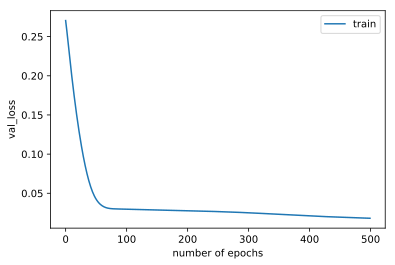

In [16]:
plt.plot(history.history['loss'],label='train')
#plt.plot(history.history['val_loss'],label='test')
plt.xlabel('number of epochs')
plt.ylabel('val_loss')
plt.legend()
#pyplot.savefig('LSTM training.png',dpi=300)
plt.show()

In [17]:
prediction=model.predict(xtest)

In [18]:
def draw_prediction(ytest,d,columns):
    
    _,axes=plt.subplots(len(columns),1,figsize=(10,20))
    
    for i,cols in enumerate(columns):
        
        axes[i].plot(ytest[:,i],label='real',color='blue')
        axes[i].plot(d[:,i],label='prediction',color='orange')
        #axes[i].set_xlabel='index'
        #axes[i].set_ylabel=cols
        axes[i].xlabel='index'
        axes[i].ylabel=cols

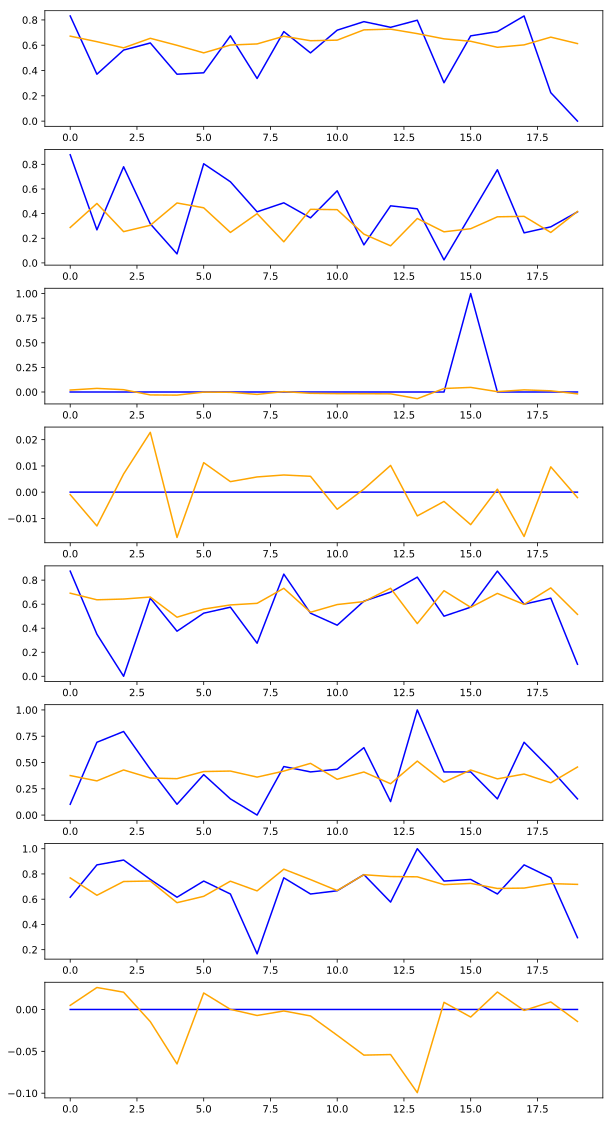

In [19]:
clmns=df.columns
draw_prediction(ytest,prediction,clmns)

In [20]:
prediction

array([[ 6.71912193e-01,  2.87518859e-01,  1.99695006e-02,
        -9.50343907e-04,  6.91406190e-01,  3.75781894e-01,
         7.68646538e-01,  4.86688688e-03],
       [ 6.28034770e-01,  4.82581615e-01,  3.67872566e-02,
        -1.28894523e-02,  6.36355579e-01,  3.24857622e-01,
         6.30864739e-01,  2.62255706e-02],
       [ 5.79346776e-01,  2.53760755e-01,  2.35856250e-02,
         6.91703707e-03,  6.42719686e-01,  4.29028273e-01,
         7.40043759e-01,  2.06076987e-02],
       [ 6.54798388e-01,  3.05350900e-01, -2.96459645e-02,
         2.27997676e-02,  6.59354985e-01,  3.52364302e-01,
         7.43884802e-01, -1.45550035e-02],
       [ 5.99434257e-01,  4.86539960e-01, -3.16494852e-02,
        -1.72802359e-02,  4.91394371e-01,  3.46051484e-01,
         5.72119594e-01, -6.50563538e-02],
       [ 5.39631307e-01,  4.47191656e-01, -1.34398136e-03,
         1.12458840e-02,  5.59290409e-01,  4.13930476e-01,
         6.22583330e-01,  1.96699090e-02],
       [ 6.01560950e-01,  2.472752

In [21]:
prediction2=scaler.inverse_transform(prediction)

In [22]:
ytest2=scaler.inverse_transform(ytest)

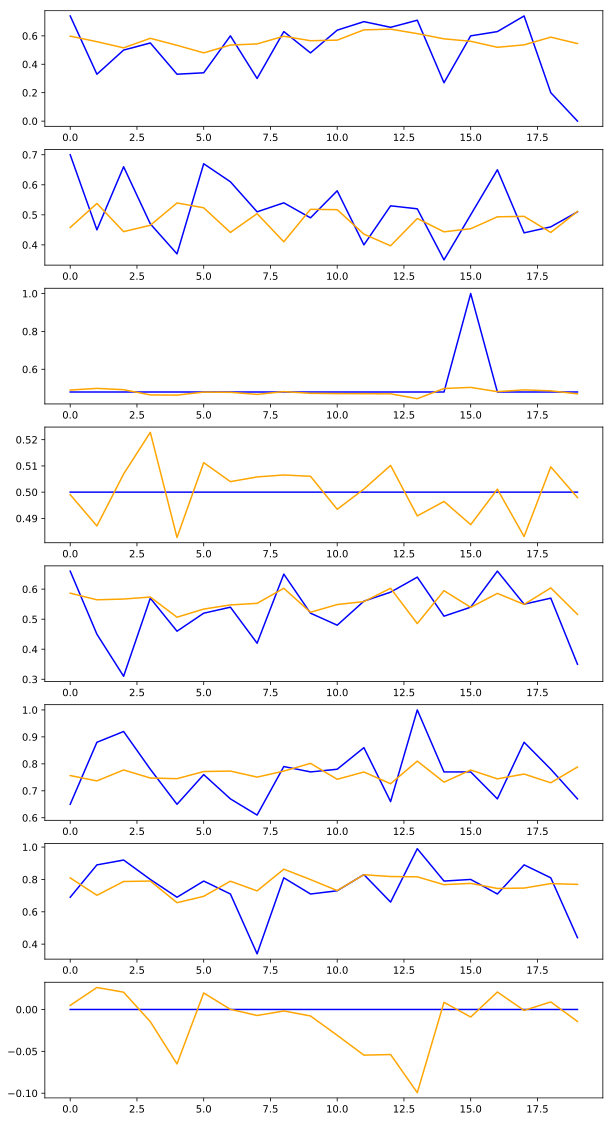

In [23]:
draw_prediction(ytest2,prediction2,clmns)

In [24]:
prediction

array([[ 6.71912193e-01,  2.87518859e-01,  1.99695006e-02,
        -9.50343907e-04,  6.91406190e-01,  3.75781894e-01,
         7.68646538e-01,  4.86688688e-03],
       [ 6.28034770e-01,  4.82581615e-01,  3.67872566e-02,
        -1.28894523e-02,  6.36355579e-01,  3.24857622e-01,
         6.30864739e-01,  2.62255706e-02],
       [ 5.79346776e-01,  2.53760755e-01,  2.35856250e-02,
         6.91703707e-03,  6.42719686e-01,  4.29028273e-01,
         7.40043759e-01,  2.06076987e-02],
       [ 6.54798388e-01,  3.05350900e-01, -2.96459645e-02,
         2.27997676e-02,  6.59354985e-01,  3.52364302e-01,
         7.43884802e-01, -1.45550035e-02],
       [ 5.99434257e-01,  4.86539960e-01, -3.16494852e-02,
        -1.72802359e-02,  4.91394371e-01,  3.46051484e-01,
         5.72119594e-01, -6.50563538e-02],
       [ 5.39631307e-01,  4.47191656e-01, -1.34398136e-03,
         1.12458840e-02,  5.59290409e-01,  4.13930476e-01,
         6.22583330e-01,  1.96699090e-02],
       [ 6.01560950e-01,  2.472752

In [25]:
new_data=pd.DataFrame(prediction2)

In [26]:
new_data.to_csv('new_corrected_data-v1-7-24-2019.csv',index=False)